## Feature Selection

- Create scikit learn basic pipeline
- Standardize the train data (Done in 8)
- Options :
    - Regularization (glmnet) (Lasso, Ridge, Elastic Net)
    - PCA , MCA
    - Trees - Feature Importance (Random Forest - with filter, Decision Tree)
    - VIF testing
    - Forward Selection
    - Backward Selection    
    - Recursive Feature Elimination
    - Feature Importance (Random Forest, Decision Tree)
    - Correlation Matrix
    


In [1]:
import pandas as pd
import numpy as np
import os

#for multicollinearity issues
from statsmodels.stats.outliers_influence import variance_inflation_factor

#for correlation heat max
import seaborn as sns
from matplotlib import pyplot as plt

#for ttest
from scipy import stats 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [3]:
file_location =  '/Users/chewy2.0/Capstone/data' ##change as necessary
os.chdir(file_location)

## this is for the log regression 

In [4]:
train = pd.read_csv('Fixed_log_standardized_train.csv', dtype = {'GEOID':'str'}, low_memory = False)


In [5]:
test = pd.read_csv('Fixed_log_stadardaized_test.csv', dtype = {'GEOID':'str'}, low_memory = False)

In [6]:
cat_columns = [
"women_involved",
"bea_region",  
"Agriculture_Forestry_Fishing_Hunting_base",
"Mining_Quarrying_and_Oil_Gas_Extraction_base",
"Utilities_base",
"Construction_base",
"Manufacturing_base",
"Wholesale_Trade_base",
"Retail_Trade_base",
"Transportation_Warehousing_base",
"Information_base",
"Finance_Insurance_base",
"Real_Estate_Rental_Leasing_base",
"Professional_Scientific_and_Technical_Services_base",
"Management_of_Companies_Enterprises_base",
"Administrative_Support_Waste_Management_Remediation_Services_base",
"Educational_Services_base",
"Health_Care_Social_Assistance_base",
"Arts_Entertainment_and_Recreation_base",
"Accommodation_Food_Services_base",
"Other_Services_except_Public_Administration_base",
"r1_involved",
"r2_involved",
"special_focus_involved",
"any_R_uni_involved"
]

train[cat_columns] = train[cat_columns].astype('category')

In [6]:
train.sample(5)
#patent num represents the number of unique patent numbers attached to that application number
# if you see a 0 that means the patent has not yet been granted

,app_num,app_yr,GEOID,patent_num,assignee,team_size,men_inventors,women_inventors,women_involved,Over25_Less9Grade,Over25_SomeHS,Over25_HSGrad,Over25_SomeCollege,Over25_Assosc,Over25_Bach,Over25_Grad,bea_region,Agriculture_Forestry_Fishing_Hunting,Mining_Quarrying_and_Oil_Gas_Extraction,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate_Rental_Leasing,Professional_Scientific_and_Technical_Services,Management_of_Companies_Enterprises,Administrative_Support_Waste_Management_Remediation_Services,Educational_Services,Health_Care_Social_Assistance,Arts_Entertainment_and_Recreation,Accommodation_Food_Services,Other_Services_except_Public_Administration,qp1,ap,est,Agriculture_Forestry_Fishing_Hunting_base,Mining_Quarrying_and_Oil_Gas_Extraction_base,Utilities_base,Construction_base,Manufacturing_base,Wholesale_Trade_base,Retail_Trade_base,Transportation_Warehousing_base,Information_base,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base,GDP,pop_gt_16,pop_gt_16_lf,pop_gt_16_lf_c,Pop_Est,Earnings_by_place_of_work,Employee_and_self-employed_contributions_for_government_social_insurance,Employer_contributions_for_employee_pension_and_insurance_funds,Employer_contributions_for_government_social_insurance,Equals_Net_earnings_by_place_of_residence,Farm_income,Farm_proprietors_income,Less_Contributions_for_government_social_insurance,Nonfarm_personal_income,Nonfarm_proprietors_income,Per_capita_personal_income_dollars,Personal_income_thousands_of_dollars,Plus_Adjustment_for_residence,Plus_Dividends_interest_and_rent,Plus_Personal_current_transfer_receipts,Population_persons,Proprietors_employment,Proprietors_income,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,apps_by_pop_gt_16_lf,Wages_by_pop_gt_16_lf,Award_by_pop_gt_16_lf,r1_involved,r2_involved,special_focus_involved,any_R_uni_involved
948491,14168788,2014,24021,1,1,2,2,0,0,3.0,6.1,24.8,19.8,6.9,23.5,15.9,Mideast,0.000000,0.000000,0.000000,2.354580,0.719884,0.595006,1.152087,0.619329,0.406839,1.343491,0.676481,1.270106,1.232209,0.798435,1.199537,0.851684,1.089139,0.968755,1.056721,963832,3970937,5975,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,12139025,187491,134627,133838,239253,7349572,424031,904061,399138,9347033,47819,33538,823169,12947794,753255,53373,12995613,2820630,2121316,1527264,243487,30248,786793,1303199,133891,103643,5259580,243381,1821,709254.0,90.167834,664.591967,0.044382,0.013526,39.067795,5.268289,0,0,0,0
835331,15394767,2016,13135,1,1,1,0,0,0,6.1,6.4,23.3,20.2,9.1,23.3,11.7,Southeast,0.035899,0.000000,0.261380,1.165363,0.778421,2.297701,1.129829,1.001144,1.479537,0.903428,0.933852,1.208234,1.770405,1.023248,0.512083,0.552975,0.663698,0.857601,1.081443,3932441,16328494,23151,0,0,0,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,45900827,658899,457651,456851,874242,26878403,1527518,2665563,1354351,25786074,3231,1265,2881869,35485269,2776858,39201,35488500,1789540,5164225,4538201,905291,156329,2778123,4019914,531655,375326,20080366,904962,15369,5189894.0,100.296573,705.304047,0.050587,0.033582,43.877029,11.340288,0,0,0,0
394464,15206583,2016,06085,1,1,2,1,0,0,7.2,5.7,14.8,16.2,7.0,26.7,22.4,Far West,0.095896,0.041632,0.363086,0.892481,0.891714,1.748018,0.665126,0.306614,4.203264,0.444942,0.779313,1.962211,2.508362,0.574393,1.670644,0.697112,0.865586,0.776443,0.691438,27665781,114930448,48278,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,267926226,1496205,1005037,1004526,1885056,162344428,9214913,12467581,6749369,127272724,194877,108735,15

## Will use cross validation 

+ so the validation set is not separated from the train set

In [7]:
# validation_data = pd.read_csv('Log_validation_standardized.csv', dtype = {'GEOID':'str'}, low_memory = False)
# validation_data[cat_columns] = validation_data[cat_columns].astype('category')
# validation_data.head()

In [7]:
fixed_cat = [
"women_involved",
"bea_region",  
"Agriculture_Forestry_Fishing_Hunting_base",
"Mining_Quarrying_and_Oil_Gas_Extraction_base",
"Utilities_base",
"Construction_base",
"Manufacturing_base",
"Wholesale_Trade_base",
"Retail_Trade_base",
"Transportation_Warehousing_base",
"Information_base",
"Finance_Insurance_base",
"Real_Estate_Rental_Leasing_base",
"Professional_Scientific_and_Technical_Services_base",
"Management_of_Companies_Enterprises_base",
"Administrative_Support_Waste_Management_Remediation_Services_base",
"Educational_Services_base",
"Health_Care_Social_Assistance_base",
"Arts_Entertainment_and_Recreation_base",
"Accommodation_Food_Services_base",
"Other_Services_except_Public_Administration_base",
"r1_involved",
"r2_involved",
"special_focus_involved",
"any_R_uni_involved"
]


fixed_numeric = [
#"team_size",
"men_inventors",
#"women_inventors", 
"Over25_Less9Grade",
"Over25_SomeHS",
"Over25_HSGrad",
"Over25_SomeCollege",
"Over25_Assosc",
"Over25_Bach",
"Over25_Grad",
"Agriculture_Forestry_Fishing_Hunting",
"Mining_Quarrying_and_Oil_Gas_Extraction",
"Utilities",
"Construction",
"Manufacturing",
"Wholesale_Trade",
"Retail_Trade",
"Transportation_Warehousing",
"Information",
"Finance_Insurance",
"Real_Estate_Rental_Leasing",
"Professional_Scientific_and_Technical_Services",
"Management_of_Companies_Enterprises",
"Administrative_Support_Waste_Management_Remediation_Services",
"Educational_Services",
"Health_Care_Social_Assistance",
"Arts_Entertainment_and_Recreation",
"Accommodation_Food_Services",
"Other_Services_except_Public_Administration",
"qp1",
"ap",
"est",
"GDP",
"pop_gt_16",
"pop_gt_16_lf",
"pop_gt_16_lf_c",
"Pop_Est",
"Earnings_by_place_of_work",
"Employee_and_self-employed_contributions_for_government_social_insurance",
"Employer_contributions_for_employee_pension_and_insurance_funds",
"Employer_contributions_for_government_social_insurance",
"Equals_Net_earnings_by_place_of_residence",
"Farm_income",
"Farm_proprietors_income",
"Less_Contributions_for_government_social_insurance",
"Nonfarm_personal_income",
"Nonfarm_proprietors_income",
"Per_capita_personal_income_dollars",
"Personal_income_thousands_of_dollars",
"Plus_Adjustment_for_residence",
"Plus_Dividends_interest_and_rent",
"Plus_Personal_current_transfer_receipts",
"Population_persons",
"Proprietors_employment",
"Proprietors_income",
"Supplements_to_wages_and_salaries",
"Total_employment",
"Wage_and_salary_employment",
"Wages_and_salaries",
"Population_Estimate",
"Applications",
"Award_Amount",
"GDP_by_labor_force",
"ap_by_est",
"est_by_pop_gt_16_lf",
"apps_by_pop_gt_16_lf",
"Wages_by_pop_gt_16_lf",
"Award_by_pop_gt_16_lf"
]

# Need to deal with Multicollinarity

- if features coorelated with other features will jack up the selection of best predictors 
    - pairs plot 
    - VIF? 

## This is for all all numeric variables

In [9]:
#gathers the numeric columns only
num_vars = train[fixed_numeric]

#get rid of inf's and nans
#num_vars = num_vars[~num_vars.isin([np.nan, np.inf, -np.inf]).any(1)]

#look at dimensions
num_vars.shape

(1213267, 66)

In [10]:
#empty df for vif info
vif_data = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data["feature"] = num_vars.columns
# VIF column 
vif_data["VIF"] = [variance_inflation_factor(num_vars.values, i) for i in range(len(num_vars.columns))]

In [11]:
vif_data.sort_values(by = 'VIF', ascending = False)

,feature,VIF
52,Proprietors_income,2.018869e+06
36,Employee_and_self-employed_contributions_for_g...,4.591758e+05
47,Plus_Adjustment_for_residence,3.476382e+05
53,Supplements_to_wages_and_salaries,1.219135e+05
44,Nonfarm_proprietors_income,5.731164e+04
42,Less_Contributions_for_government_social_insur...,3.153346e+04
50,Population_persons,2.366958e+04
51,Proprietors_employment,1.474659e+04
41,Farm_proprietors_income,1.421478e+04
49,Plus_Personal_current_transfer_receipts,1.277020e+04


Text(0.5, 1.0, 'Correlation Between Numeric Info')

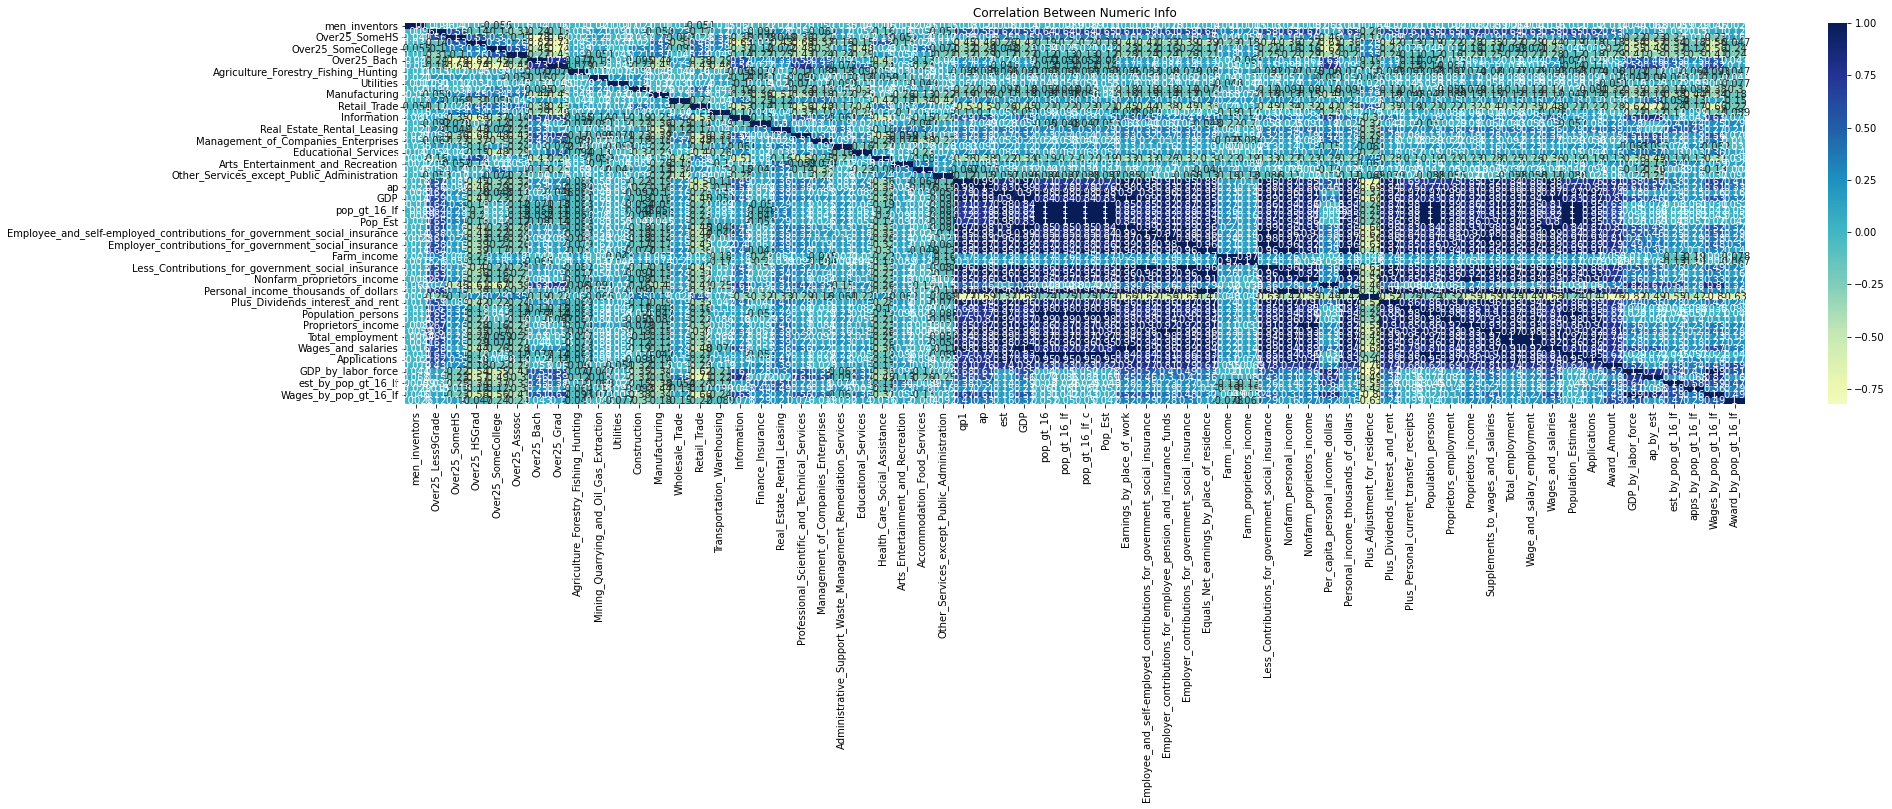

In [12]:
my_corr_all = num_vars.corr()
plt.figure(figsize = (30,7))
sns.heatmap(my_corr_all, center=0,  annot=True, cmap='YlGnBu')
plt.title("Correlation Between Numeric Info")

## Now with fewer variables to hopefully lower the VIFS???

In [8]:
limited_numeric = [
#"team_size",
#"men_inventors",
#"women_inventors", 
#"Over25_Less9Grade",
#"Over25_SomeHS",
#"Over25_HSGrad",
#"Over25_SomeCollege",
#"Over25_Assosc",
#"Over25_Bach",
"Over25_Grad",
"Agriculture_Forestry_Fishing_Hunting",
"Mining_Quarrying_and_Oil_Gas_Extraction",
"Utilities",
"Construction",
"Manufacturing",
"Wholesale_Trade",
"Retail_Trade",
"Transportation_Warehousing",
"Information",
"Finance_Insurance",
"Real_Estate_Rental_Leasing",
"Professional_Scientific_and_Technical_Services",
"Management_of_Companies_Enterprises",
"Administrative_Support_Waste_Management_Remediation_Services",
"Educational_Services",
"Health_Care_Social_Assistance",
"Arts_Entertainment_and_Recreation",
"Accommodation_Food_Services",
"Other_Services_except_Public_Administration",
#"qp1",
#"ap",
#"est",
#"GDP",
#"pop_gt_16",
"pop_gt_16_lf",
#"pop_gt_16_lf_c",
#"Pop_Est",
#"Earnings_by_place_of_work",
#"Employee_and_self-employed_contributions_for_government_social_insurance",
#"Employer_contributions_for_employee_pension_and_insurance_funds",
#"Employer_contributions_for_government_social_insurance",
#"Equals_Net_earnings_by_place_of_residence",
"Farm_income",
#"Farm_proprietors_income",
#"Less_Contributions_for_government_social_insurance",
#"Nonfarm_personal_income",
#"Nonfarm_proprietors_income",
#"Per_capita_personal_income_dollars",
#"Personal_income_thousands_of_dollars",
#"Plus_Adjustment_for_residence",
#"Plus_Dividends_interest_and_rent",
#"Plus_Personal_current_transfer_receipts",
#"Population_persons",
#"Proprietors_employment",
#"Proprietors_income",
# "Supplements_to_wages_and_salaries",
# "Total_employment",
# "Wage_and_salary_employment",
# "Wages_and_salaries",
# "Population_Estimate",
#"Applications",
"Award_Amount",
"GDP_by_labor_force",
#"ap_by_est",
#"est_by_pop_gt_16_lf",
"apps_by_pop_gt_16_lf",
#"Wages_by_pop_gt_16_lf",
#"Award_by_pop_gt_16_lf"
]

In [9]:
#gathers the numeric columns only
num_vars_2 = train[limited_numeric]

#get rid of inf's and nans
#num_vars_2 = num_vars_2[~num_vars_2.isin([np.nan, np.inf, -np.inf]).any(1)]

#look at dimensions
num_vars_2.shape

(1213267, 25)

In [15]:
#empty df for vif info
vif_data_2 = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data_2["feature"] = num_vars_2.columns
# VIF column 
vif_data_2["VIF"] = [variance_inflation_factor(num_vars_2.values, i) for i in range(len(num_vars_2.columns))]

In [16]:
vif_data_2.sort_values(by = 'VIF', ascending = False)

,feature,VIF
7,Retail_Trade,48.088664
0,Over25_Grad,38.777581
23,GDP_by_labor_force,35.347609
16,Health_Care_Social_Assistance,24.914709
11,Real_Estate_Rental_Leasing,24.849584
14,Administrative_Support_Waste_Management_Remedi...,22.641286
18,Accommodation_Food_Services,21.190037
19,Other_Services_except_Public_Administration,19.576703
12,Professional_Scientific_and_Technical_Services,17.828955
4,Construction,16.243219


In [28]:
#num_vars_2.corr()

In [17]:
my_corr = num_vars_2.corr()

Text(0.5, 1.0, 'Correlation Between Limited Numeric Info')

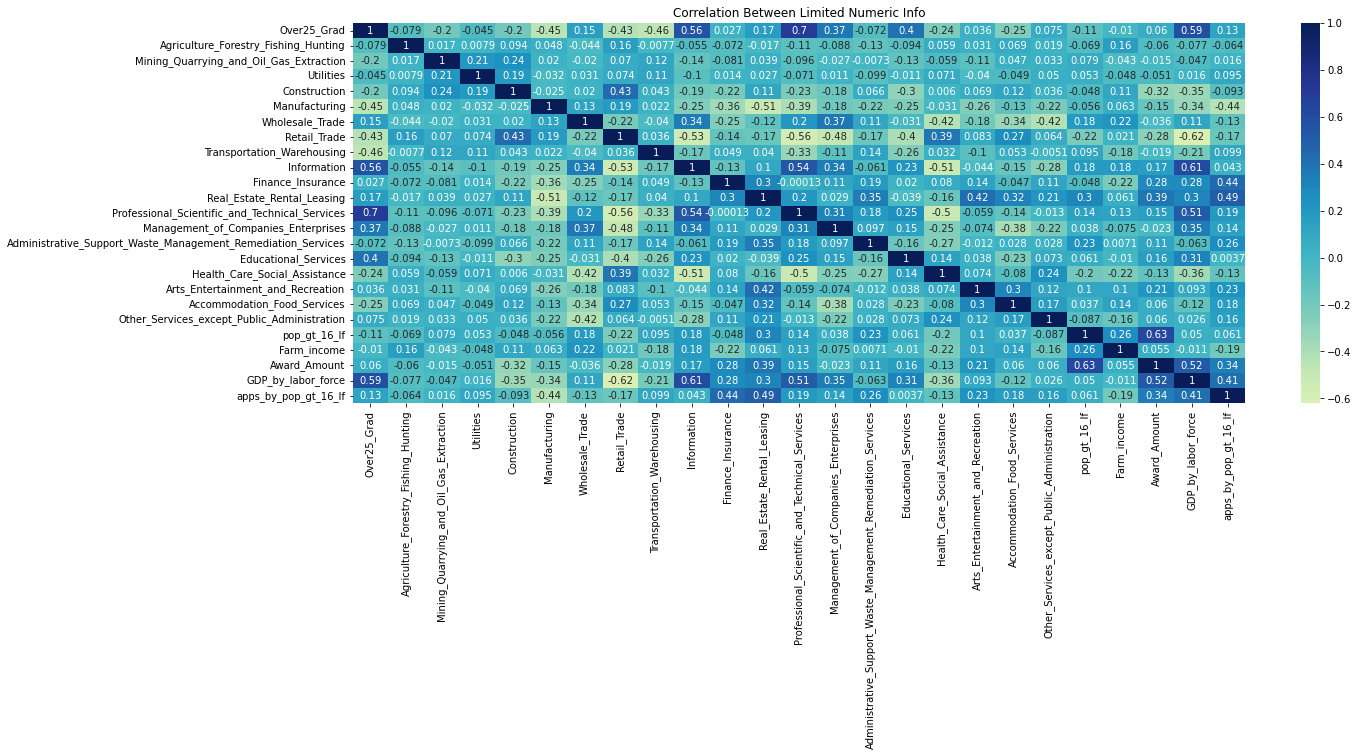

In [18]:
plt.figure(figsize = (20,7))
sns.heatmap(my_corr, center=0,  annot=True, cmap='YlGnBu')
plt.title("Correlation Between Limited Numeric Info")

### Lasso for Feature Selection 
- not important features got to zero

In [10]:
### from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
#with cross validation and l1 (lasso)
#model = LogisticRegressionCV(solver='saga', random_state=0, penalty = 'elasticnet', cv = 2, l1_ratios = [0.5,0.5])
#model = LogisticRegressionCV(solver = 'liblinear', max_iter=2000, cv=2, penalty = 'l1')
model = LogisticRegressionCV(solver = 'liblinear', cv=2, penalty = 'l1')


# without cross validation
#model = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1')


In [ ]:
#model.fit(train_no_nans[numeric], train_no_nans['women_involved'])
model.fit(train[fixed_numeric], train['women_involved'])


# clf = linear_model.LogisticRegression(
#     penalty="l1",
#     solver="liblinear",
#     tol=1e-6,
#     max_iter=int(1e6),
#     warm_start=True,
#     intercept_scaling=10000.0,
# )

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
df = pd.DataFrame()
df['var'] = train[numeric].columns
df['coef'] = model.coef_[0]
#df['magnitude_coef']= np.abs(model.coef_[0])

In [ ]:
df.sort_values(by = 'coef', key = abs, ascending = False)

# for the new notebook - left off copying here

In [ ]:
# now with the limited variables 
#model_limited = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1')
#with cv
model_limited = LogisticRegressionCV(solver = 'liblinear', max_iter=2000, cv=5, penalty = 'l1')


#now fit
model_limited.fit(train[limited_numeric], train['women_involved'])


In [12]:
df_limited = pd.DataFrame()
df_limited['var'] = train[limited_numeric].columns
df_limited['coef'] = model_limited.coef_[0]
#df_limited['magnitude_coef']= np.abs(model_limited.coef_[0])
df_limited.sort_values(by = 'coef', key = abs, ascending = False)

,var,coef
7,Retail_Trade,-3.898530e-01
5,Manufacturing,-2.574617e-01
18,Accommodation_Food_Services,-2.410057e-01
10,Finance_Insurance,-1.590559e-02
2,Mining_Quarrying_and_Oil_Gas_Extraction,-1.438488e-02
23,GDP_by_labor_force,-1.424256e-03
0,Over25_Grad,-1.294865e-03
20,pop_gt_16_lf,-1.659205e-07
21,Farm_income,1.158877e-07
22,Award_Amount,2.461409e-09


## See how it did using the validation 

- with all numeric vars

In [35]:
y_pred = model.predict(test[numeric])
print(confusion_matrix(test['women_involved'], y_pred))
print(classification_report(test['women_involved'], y_pred))

[[129041      0]
 [ 40815      1]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86    129041
           1       1.00      0.00      0.00     40816

    accuracy                           0.76    169857
   macro avg       0.88      0.50      0.43    169857
weighted avg       0.82      0.76      0.66    169857



In [100]:
#adjust the trheshold 
#y_pred2 = (model_limited.predict_proba(validation_data[limited_numeric])[:,1] >= 0.2).astype(bool) # set threshold as 0.3


In [17]:
# with limited numerics
y_pred2 = model_limited.predict(test[limited_numeric])
print(confusion_matrix(test['women_involved'], y_pred2))
print(classification_report(test['women_involved'], y_pred2))

[[43259 59268]
 [11323 20958]]
              precision    recall  f1-score   support

           0       0.79      0.42      0.55    102527
           1       0.26      0.65      0.37     32281

    accuracy                           0.48    134808
   macro avg       0.53      0.54      0.46    134808
weighted avg       0.67      0.48      0.51    134808



# Now with Elastinet

In [ ]:
#with cross validation and l1 (lasso)
#model = LogisticRegressionCV(solver='saga', random_state=0, penalty = 'elastinet', cv = 2, l1_ratios = [0.5,0.5])

# without cross validation
model2 = LogisticRegression(solver='saga', random_state=0, penalty = 'elasticnet', l1_ratio = 0.5, max_iter = 10000)

In [ ]:
model2.fit(train[numeric], train['women_involved'])


In [ ]:
df2 = pd.DataFrame()
df2['var'] = train[numeric].columns
df2['coef'] = model2.coef_[0]
#df2['magnitude_coef']= np.abs(model2.coef_[0])

In [ ]:
df2.sort_values(by ='magnitude_coef', key = abs, ascending = False)

In [ ]:
y_pred2 = model2.predict(validation_data[numeric])
print(confusion_matrix(validation_data['women_involved'], y_pred2))
print(classification_report(validation_data['women_involved'], y_pred2))

In [11]:
# now with limited variables 
model2_limited = LogisticRegression(solver='saga', random_state=0, penalty = 'elasticnet', l1_ratio = 0.5, max_iter = 10000)

#fit the model
model2_limited.fit(train[limited_numeric], train['women_involved'])


LogisticRegression(l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   random_state=0, solver='saga')

In [ ]:
df2_limited = pd.DataFrame()
df2_limited['var'] = train[limited_numeric].columns
df2_limited['coef'] = model2_limited.coef_[0]
df2_limited.sort_values(by ='coef', key = abs,  ascending = False)

,var,coef
23,GDP_by_labor_force,-2.373804e-06
21,Farm_income,-1.374037e-06
20,pop_gt_16_lf,-7.742228e-07
0,Over25_Grad,-2.664964e-07
13,Management_of_Companies_Enterprises,-2.155005e-08
9,Information,-1.979198e-08
12,Professional_Scientific_and_Technical_Services,-1.944303e-08
10,Finance_Insurance,-1.851292e-08
6,Wholesale_Trade,-1.793331e-08
5,Manufacturing,-1.779848e-08


In [ ]:
#df_limited.sort_values(by ='coef', key = abs,  ascending = False)

# check for correlation with the response variable

In [37]:
#enough evidence to say that mean value of continuous variable is different for women_involved

# H0: u for women involved = u for women NOt involved 
#separate values 
def cat_cont_id_ttest():
    for i in range(len(numeric)):
        print(numeric[i])
        no_women = train.query("women_involved == 0")[numeric[i]]
        women = train.query("women_involved == 1")[numeric[i]]
        print(stats.ttest_ind(no_women, women, equal_var = False))

In [38]:
cat_cont_id_ttest()

#not important variables
#less 9thgrade, total employment, wage and salary emloyment

num_ipcs
Ttest_indResult(statistic=14.381548299411667, pvalue=6.892286520625126e-47)
Over25_Less9Grade
Ttest_indResult(statistic=-1.577703855325242, pvalue=0.11463419986223415)
Over25_SomeHS
Ttest_indResult(statistic=45.24405758593537, pvalue=0.0)
Over25_HSGrad
Ttest_indResult(statistic=49.111690532225936, pvalue=0.0)
Over25_SomeCollege
Ttest_indResult(statistic=84.36534937239904, pvalue=0.0)
Over25_Assosc
Ttest_indResult(statistic=58.468577825021555, pvalue=0.0)
Over25_Bach
Ttest_indResult(statistic=-54.26890850816165, pvalue=0.0)
Over25_Grad
Ttest_indResult(statistic=-85.05208787458554, pvalue=0.0)
ap_by_est
Ttest_indResult(statistic=-44.866220567432656, pvalue=0.0)
pop_gt_16_lf
Ttest_indResult(statistic=7.195023273840791, pvalue=6.252527367538481e-13)
est_by_pop_gt_16_lf
Ttest_indResult(statistic=-37.02106709329154, pvalue=1.2996931319836597e-299)
Total_employment
Ttest_indResult(statistic=0.07348353711638465, pvalue=0.9414213697842445)
Pop_Est
Ttest_indResult(statistic=9.4238835618

In [39]:
# side by side boxplots 

plt.figure(figsize = (10,7))
def box_machine():
    for i in range(len(numeric)):
        sns.boxplot(x = 'women_involved', y = numeric[i], data = train)
        plt.title(numeric[i])
        plt.show()

<Figure size 720x504 with 0 Axes>

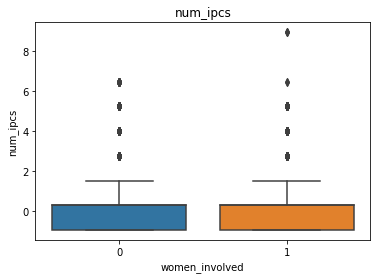

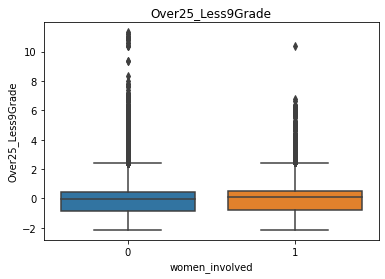

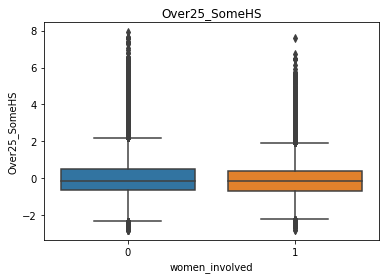

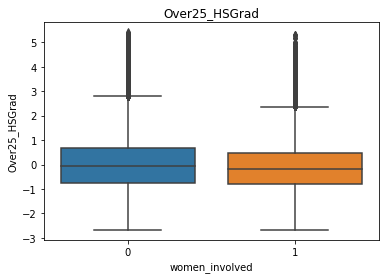

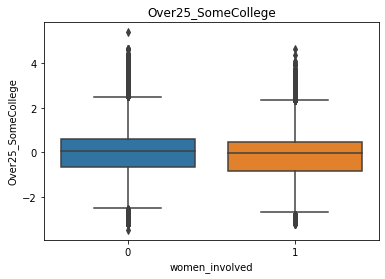

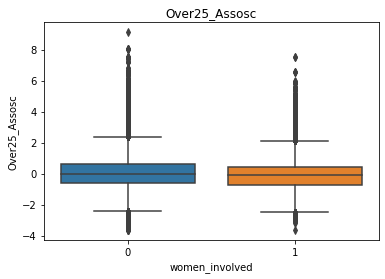

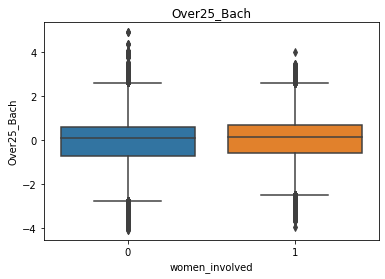

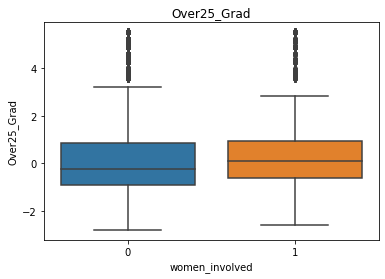

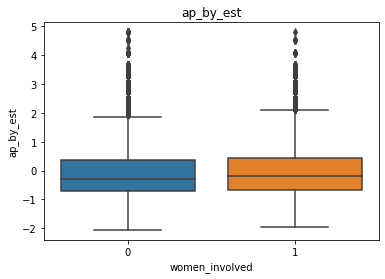

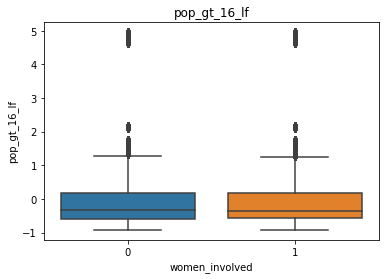

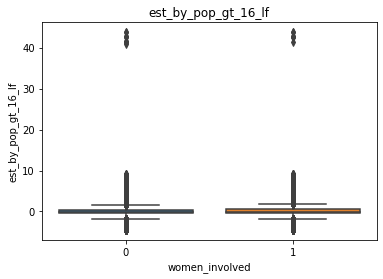

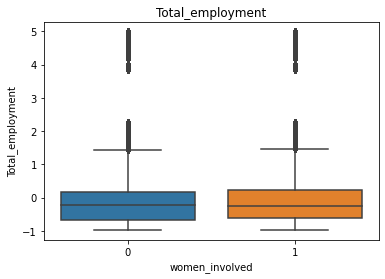

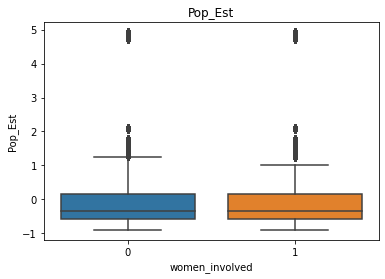

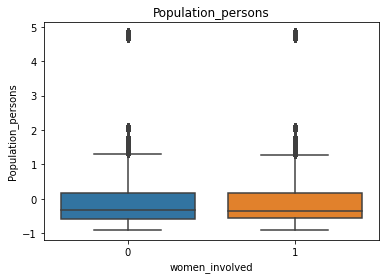

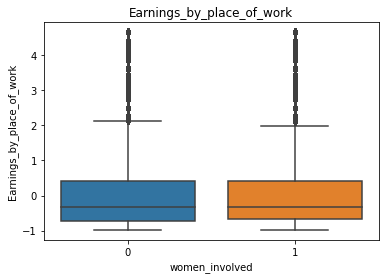

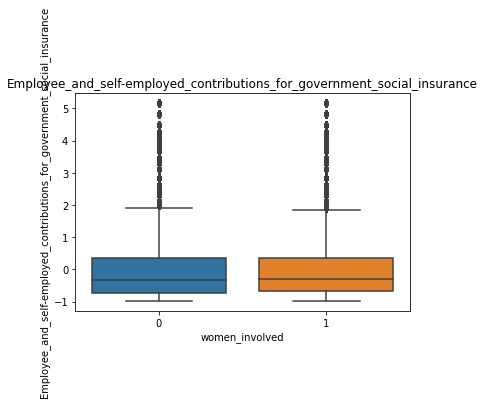

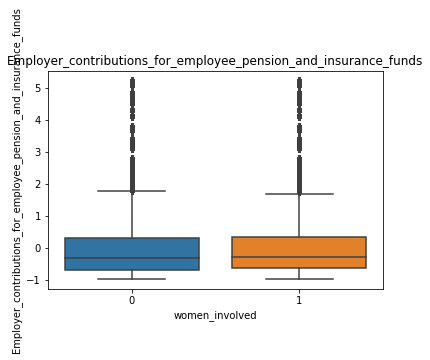

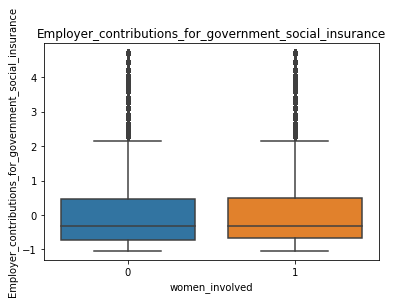

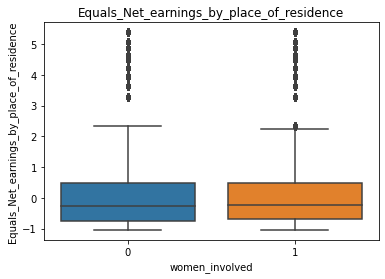

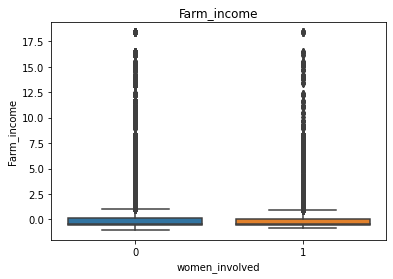

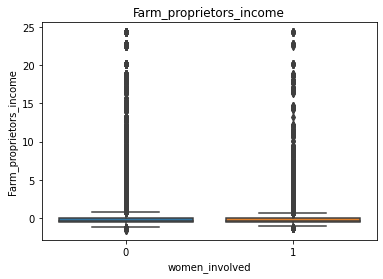

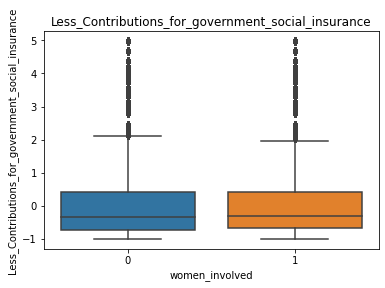

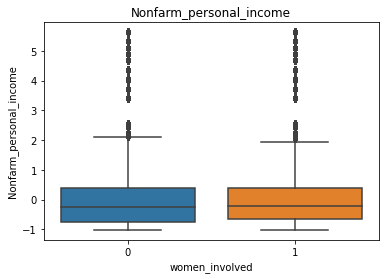

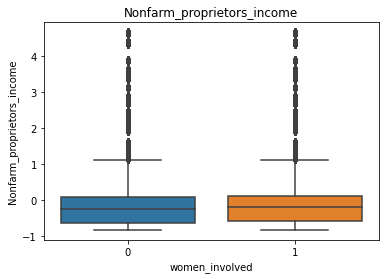

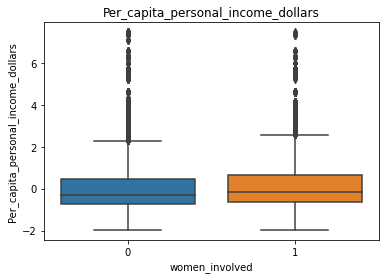

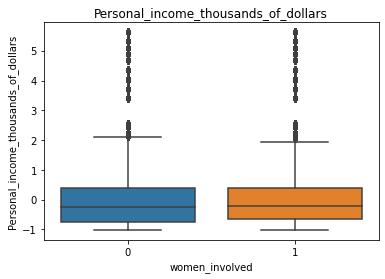

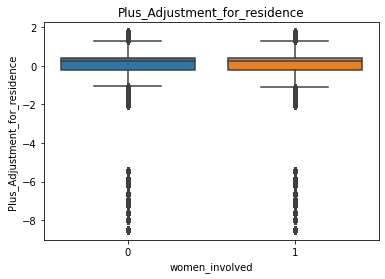

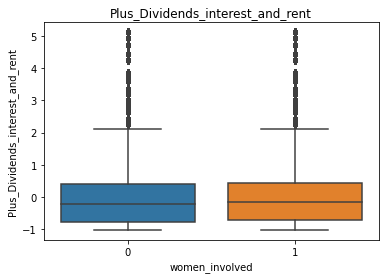

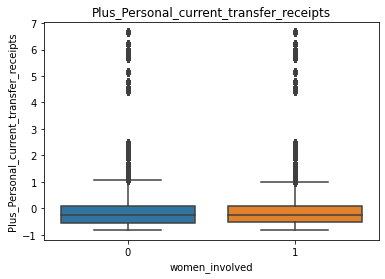

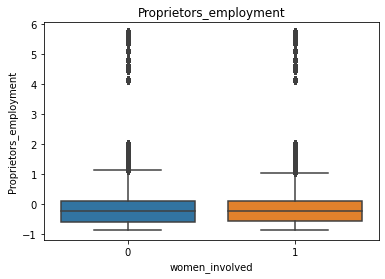

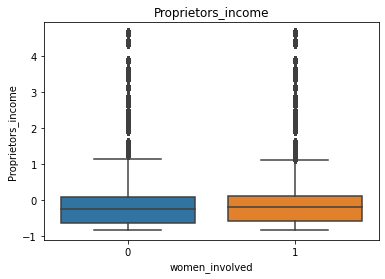

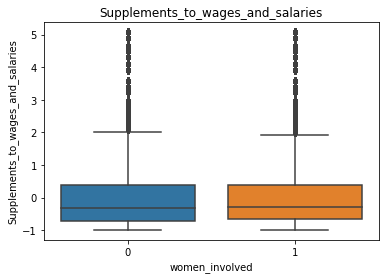

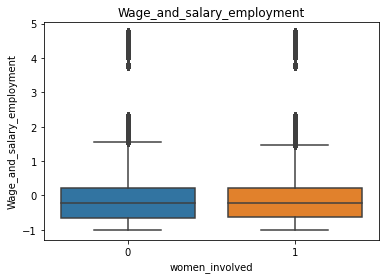

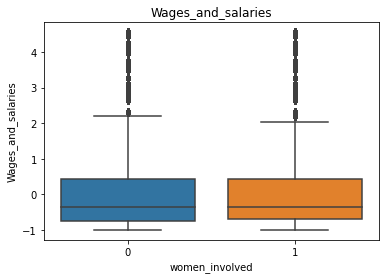

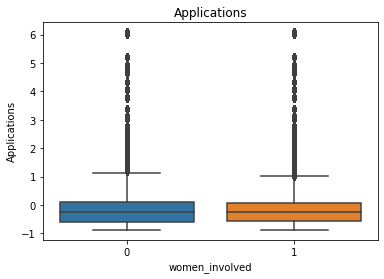

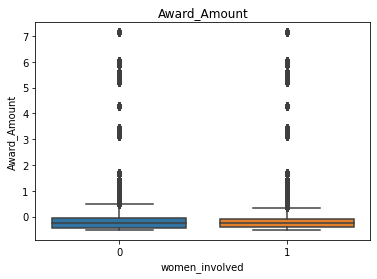

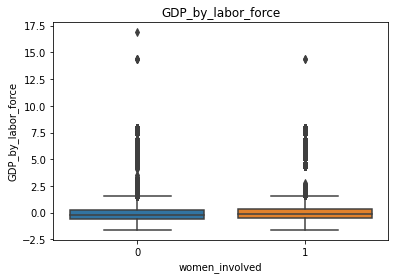

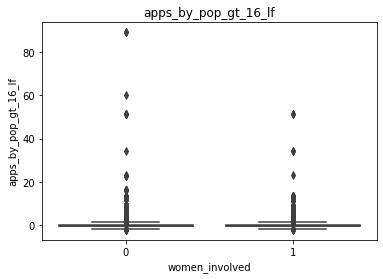

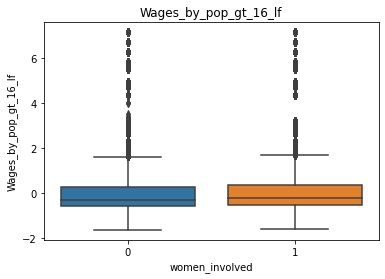

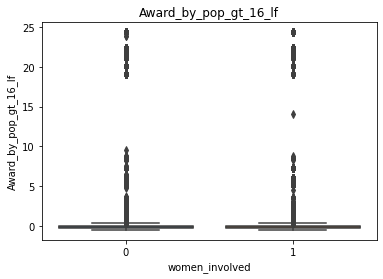

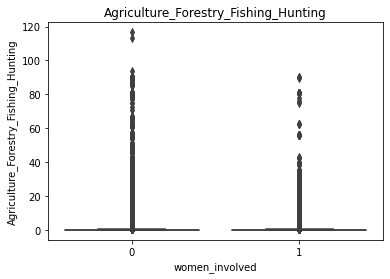

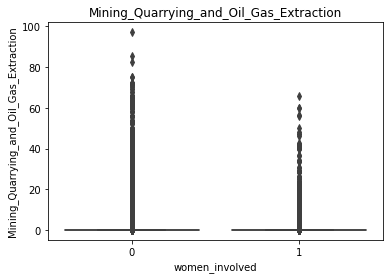

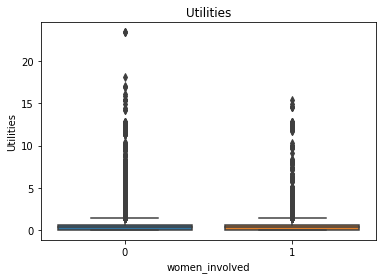

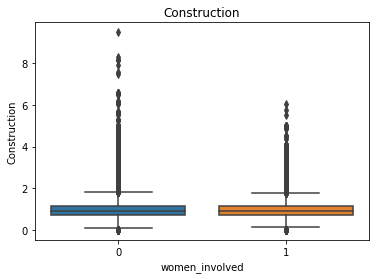

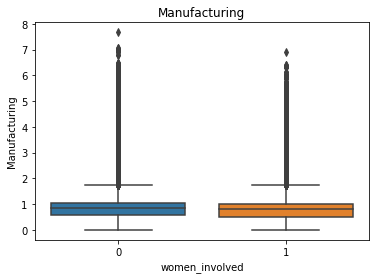

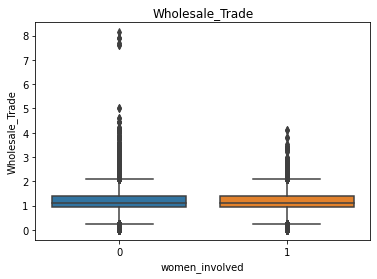

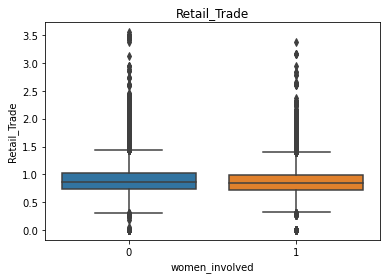

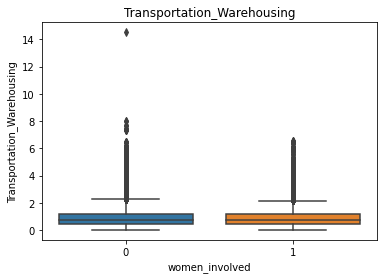

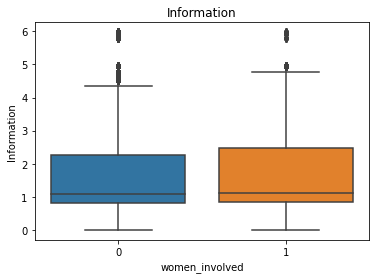

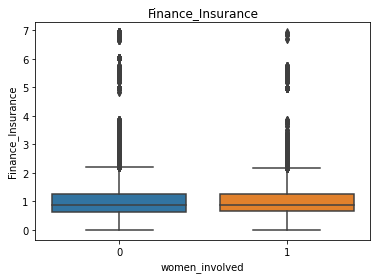

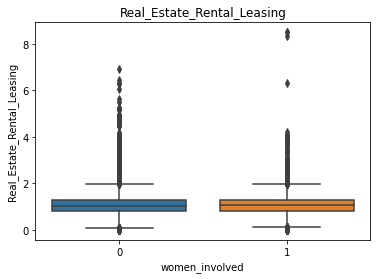

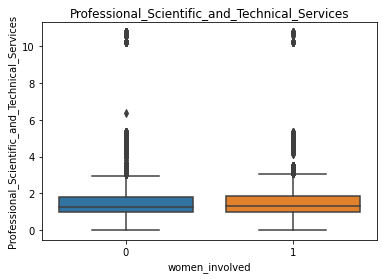

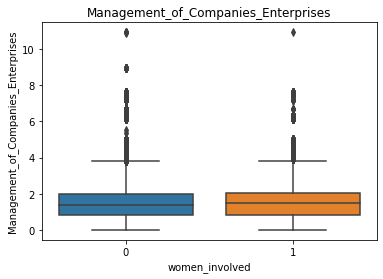

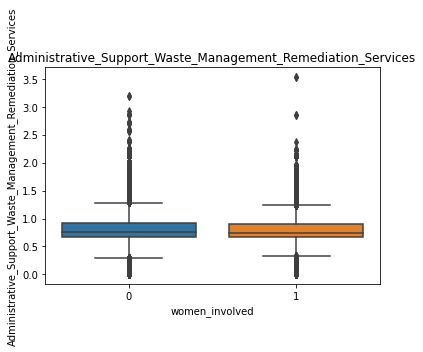

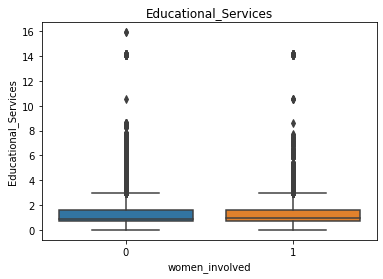

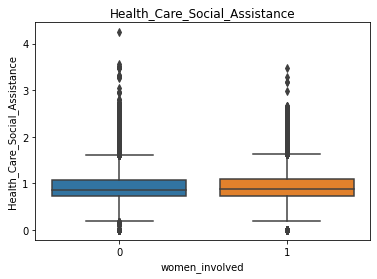

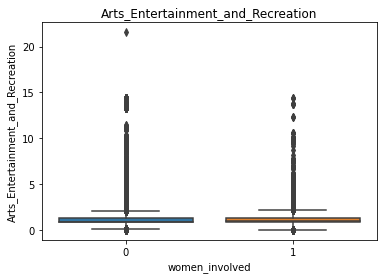

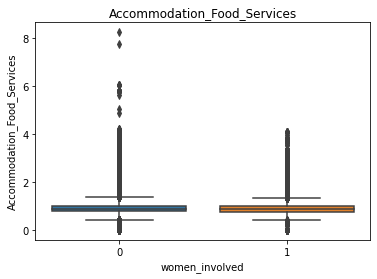

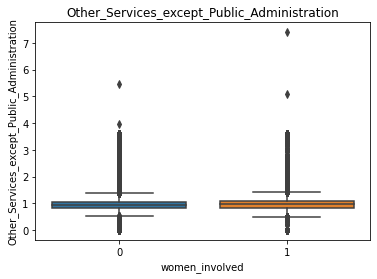

In [40]:
box_machine()

## Lasso with limited numeric and categorical

In [50]:
# one hot encoding for categorical variables
train_limited_encoded = pd.concat([train[categorical], train[limited_numeric], pd.get_dummies(train.bea_region)], axis = 1)

In [51]:
# now with the limited variables 
model_limited_cat = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1')

#now fit
model_limited_cat.fit(train_limited_encoded, train['women_involved'])


LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [52]:
df_limited_cat = pd.DataFrame()
df_limited_cat['var'] = train_limited_encoded.columns
df_limited_cat['coef'] = model_limited_cat.coef_[0]
df_limited_cat.sort_values(by = 'coef', key = abs, ascending = False)

,var,coef
34,Rocky Mountain,-0.845430
1,r1,0.792104
3,special_focus,0.768930
35,Southeast,-0.684002
32,New England,-0.638806
36,Southwest,-0.620822
2,r2,0.598939
33,Plains,-0.593000
30,Great Lakes,-0.578867
31,Mideast,-0.489710


In [53]:
# one hot encoding for categorical variables
val_limited_encoded = pd.concat([validation_data[categorical], validation_data[limited_numeric], pd.get_dummies(validation_data.bea_region)], axis = 1)

In [54]:
y_pred3 = model_limited_cat.predict(val_limited_encoded)
print(confusion_matrix(validation_data['women_involved'], y_pred3))
print(classification_report(validation_data['women_involved'], y_pred3))

[[128899    142]
 [ 40719     97]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86    129041
           1       0.41      0.00      0.00     40816

    accuracy                           0.76    169857
   macro avg       0.58      0.50      0.43    169857
weighted avg       0.67      0.76      0.66    169857



In [396]:
categorical = [
#'ipc',
#'ipc_A',
#'ipc_B',
#'ipc_C',
#'ipc_D',
#'ipc_E',
#'ipc_F',
#'ipc_G',
#'ipc_H',
'already_granted',
#'Control',
'r1',
'r2',
'special_focus',
#'bea_region',
#'Agriculture_Forestry_Fishing_Hunting_base',
# 'Mining_Quarrying_and_Oil_Gas_Extraction_base',
# 'Utilities_base',
# 'Construction_base',
# 'Manufacturing_base',
# 'Wholesale_Trade_base',
# 'Retail_Trade_base',
# 'Transportation_Warehousing_base',
# 'Information_base',
# 'Finance_Insurance_base',
# 'Real_Estate_Rental_Leasing_base',
# 'Professional_Scientific_and_Technical_Services_base',
# 'Management_of_Companies_Enterprises_base',
# 'Administrative_Support_Waste_Management_Remediation_Services_base',
# 'Educational_Services_base',
# 'Health_Care_Social_Assistance_base',
# 'Arts_Entertainment_and_Recreation_base',
# 'Accommodation_Food_Services_base',
# 'Other_Services_except_Public_Administration_base'
]

# get rid of the small coef predictors
limited_numeric3 = [
 #'num_ipcs',
 #'team_size',
 #'men_inventors',
 #'women_inventors',
 #'Over25_Less9Grade',
 #'Over25_SomeHS',
 #'Over25_HSGrad',
 #'Over25_SomeCollege',
 #'Over25_Assosc',
 #'Over25_Bach',
 'Over25_Grad',
 #'ap_by_est',
 #'pop_gt_16_lf',
 #'est_by_pop_gt_16_lf',
 #'Total_employment',
 #'Pop_Est',
 #'Population_Estimate',
 #'Population_persons',
 #'Earnings_by_place_of_work',
 #'Employee_and_self-employed_contributions_for_government_social_insurance',
 #'Employer_contributions_for_employee_pension_and_insurance_funds',
 #'Employer_contributions_for_government_social_insurance',
 #'Equals_Net_earnings_by_place_of_residence',
 #'Farm_income',
 #'Farm_proprietors_income',
 #'Less_Contributions_for_government_social_insurance',
 #'Nonfarm_personal_income',
 #'Nonfarm_proprietors_income',
 #'Per_capita_personal_income_dollars',
 #'Personal_income_thousands_of_dollars',
 #'Plus_Adjustment_for_residence',
 #'Plus_Dividends_interest_and_rent',
 #'Plus_Personal_current_transfer_receipts',
 #'Proprietors_employment',
 #'Proprietors_income',
 #'Supplements_to_wages_and_salaries',
 #'Wage_and_salary_employment',
 #'Wages_and_salaries',
 #'Applications',
 #'Award_Amount',
 #'GDP_by_labor_force',
 #'apps_by_pop_gt_16_lf',
 #'Wages_by_pop_gt_16_lf',
 #'Award_by_pop_gt_16_lf',
 #'Agriculture_Forestry_Fishing_Hunting',
#'Mining_Quarrying_and_Oil_Gas_Extraction',
#'Utilities',
#'Construction',
#'Manufacturing',
#'Wholesale_Trade',
#'Retail_Trade',
#'Transportation_Warehousing',
#'Information',
#'Finance_Insurance',
#'Real_Estate_Rental_Leasing',
#'Professional_Scientific_and_Technical_Services',
#'Management_of_Companies_Enterprises',
#'Administrative_Support_Waste_Management_Remediation_Services',
#'Educational_Services',
#'Health_Care_Social_Assistance',
#'Arts_Entertainment_and_Recreation',
#'Accommodation_Food_Services',
#'Other_Services_except_Public_Administration'
]

In [321]:
#gathers the numeric columns only
num_vars_3 = train[limited_numeric3]

#look at dimensions
#num_vars_2.shape

#empty df for vif info
vif_data_3 = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data_3["feature"] = num_vars_3.columns
# VIF column 
vif_data_3["VIF"] = [variance_inflation_factor(num_vars_3.values, i) for i in range(len(num_vars_3.columns))]


In [309]:
vif_data_3.sort_values(by = 'VIF', ascending = False)

,feature,VIF
0,men_inventors,1.003369
1,Over25_Grad,1.003369


In [493]:
# some high VIFS
# my_corr3 = num_vars_3.corr()
# plt.figure(figsize = (20,7))
# sns.heatmap(my_corr3, center=0,  annot=True, cmap='YlGnBu')
# plt.title("Correlation Between Limited Numeric Info")

In [397]:
# one hot encoding for categorical variables
train_limited3_encoded = pd.concat([train[categorical], train[limited_numeric3]], axis = 1) #, pd.get_dummies(train.bea_region)], axis = 1)
#train_limited3_encoded = train[categorical]

In [398]:
# now with the limited variables 
model_limited3_cat = LogisticRegression(solver='liblinear', fit_intercept = True, random_state=0, penalty = 'l1')

#now fit
model_limited3_cat.fit(train_limited3_encoded, train['women_involved'])

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [399]:
df3_limited_cat = pd.DataFrame()
df3_limited_cat['var'] = train_limited3_encoded.columns
df3_limited_cat['coef'] = model_limited3_cat.coef_[0]
df3_limited_cat.sort_values(by = 'coef',key = abs,  ascending = False)

,var,coef
3,special_focus,0.837137
1,r1,0.756272
2,r2,0.534843
4,Over25_Grad,0.161047
0,already_granted,-0.106774


In [400]:
# one hot encoding for categorical variables
val_limited3_encoded = pd.concat([validation_data[categorical], validation_data[limited_numeric3]], axis = 1) #, pd.get_dummies(validation_data.bea_region)], axis = 1)
#val_limited3_encoded = validation_data[categorical]

In [407]:
y_pred4 = (model_limited3_cat.predict_proba(val_limited3_encoded)[:,1] >= 0.23).astype(bool) # set threshold as 0.2

In [374]:
def con_matrix_expanded(ground_truth, preds):
    tn, fp, fn, tp = confusion_matrix(ground_truth, preds).ravel()
    print("False_Pos_Rate = ", round(fp/(tn+fp), 2))
    print("False_Neg_Rate = ", round(fn/(fn+tp), 2))
    print("True_Pos_Rate = ", round(tp/(fn+tp), 2))
    print("True_Neg_Rate = ", round(tn/(tn+fp), 2))
    print("Accuracy =  " , round((tp + tn)/(tn + fp + fn + tp), 3))



#recall is sensitivity or True positive rate
#specificity is the true negative rate
#Precision (PREC) is calculated as the number of correct positive predictions 
#divided by the total number of positive predictions. It is also called positive 
#predictive value (PPV). The best precision is 1.0, whereas the worst is 0.0.
    

In [408]:
#y_pred4 = model_limited3_cat.predict(val_limited3_encoded)
print(confusion_matrix(validation_data['women_involved'], y_pred4))

#tn, fp, fn, tp = confusion_matrix(validation_data['women_involved'], y_pred4).ravel()
#print(tn, fp, fn, tp)
con_matrix_expanded(validation_data['women_involved'], y_pred4) 

print(classification_report(validation_data['women_involved'], y_pred4))

[[62323 66718]
 [16065 24751]]
False_Pos_Rate =  0.52
False_Neg_Rate =  0.39
True_Pos_Rate =  0.61
True_Neg_Rate =  0.48
Accuracy =   0.513
              precision    recall  f1-score   support

           0       0.80      0.48      0.60    129041
           1       0.27      0.61      0.37     40816

    accuracy                           0.51    169857
   macro avg       0.53      0.54      0.49    169857
weighted avg       0.67      0.51      0.55    169857



In [439]:
#roc curve
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, roc_auc_score

# fpr, tpr, _ = roc_curve(validation_data['women_involved'], y_pred4)

# print(roc_auc_score(validation_data['women_involved'], y_pred4))
# plt.figure()
# plt.plot(fpr, tpr)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.show()

In [440]:
# looking into ipc as predictor but only availible for granted patents

In [442]:
#look into ipc just for fun

train_granted = train.query("already_granted == 1")
train_granted = train_granted[~train_granted.ipc_A.isna()]
print(train_granted.shape)

val_granted = validation_data.query("already_granted == 1")
val_granted = val_granted[~val_granted.ipc_A.isna()]
print(val_granted.shape)


(756841, 112)
(93882, 112)


In [481]:
categorical_g = [
#'ipc',
'ipc_A',
'ipc_B',
'ipc_C',
'ipc_D',
'ipc_E',
'ipc_F',
#'ipc_G',
#'ipc_H',
#'already_granted',
'r1',
'r2',
'special_focus'
]

# get rid of the small coef predictors
limited_numeric3 = [
 #'num_ipcs',
 #'team_size',
 #'men_inventors',
 #'women_inventors',
 #'Over25_Less9Grade',
 #'Over25_SomeHS',
 #'Over25_HSGrad',
 #'Over25_SomeCollege',
 #'Over25_Assosc',
 #'Over25_Bach',
 'Over25_Grad',
 #'ap_by_est',
 #'pop_gt_16_lf',
 #'est_by_pop_gt_16_lf',
 #'Total_employment',
 #'Pop_Est',
 #'Population_Estimate',
 #'Population_persons',
 #'Earnings_by_place_of_work',
 #'Employee_and_self-employed_contributions_for_government_social_insurance',
 #'Employer_contributions_for_employee_pension_and_insurance_funds',
 #'Employer_contributions_for_government_social_insurance',
 #'Equals_Net_earnings_by_place_of_residence',
 #'Farm_income',
 #'Farm_proprietors_income',
 #'Less_Contributions_for_government_social_insurance',
 #'Nonfarm_personal_income',
 #'Nonfarm_proprietors_income',
 #'Per_capita_personal_income_dollars',
 #'Personal_income_thousands_of_dollars',
 #'Plus_Adjustment_for_residence',
 #'Plus_Dividends_interest_and_rent',
 #'Plus_Personal_current_transfer_receipts',
 #'Proprietors_employment',
 #'Proprietors_income',
 #'Supplements_to_wages_and_salaries',
 #'Wage_and_salary_employment',
 #'Wages_and_salaries',
 #'Applications',
 #'Award_Amount',
 #'GDP_by_labor_force',
 #'apps_by_pop_gt_16_lf',
 #'Wages_by_pop_gt_16_lf',
 #'Award_by_pop_gt_16_lf',
 #'Agriculture_Forestry_Fishing_Hunting',
#'Mining_Quarrying_and_Oil_Gas_Extraction',
#'Utilities',
#'Construction',
#'Manufacturing',
#'Wholesale_Trade',
#'Retail_Trade',
#'Transportation_Warehousing',
#'Information',
#'Finance_Insurance',
#'Real_Estate_Rental_Leasing',
#'Professional_Scientific_and_Technical_Services',
#'Management_of_Companies_Enterprises',
#'Administrative_Support_Waste_Management_Remediation_Services',
#'Educational_Services',
#'Health_Care_Social_Assistance',
#'Arts_Entertainment_and_Recreation',
#'Accommodation_Food_Services',
#'Other_Services_except_Public_Administration'
]

In [482]:
# one hot encoding for categorical variables
train_limitedg_encoded = pd.concat([train_granted[categorical_g], train_granted[limited_numeric3]], axis = 1) #, pd.get_dummies(train.bea_region)], axis = 1)

#tried with the bea region included but all regions had negative coefficents??? 
#train_limitedg_encoded = pd.concat([train_granted[categorical_g], train_granted[limited_numeric3], pd.get_dummies(train_granted.bea_region)], axis = 1)


# now with the limited variables 
model_limitedg_cat = LogisticRegression(solver='liblinear', fit_intercept = True, random_state=0, penalty = 'l1')

#now fit
model_limitedg_cat.fit(train_limitedg_encoded, train_granted['women_involved'])

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [483]:
dfg_limited_cat = pd.DataFrame()
dfg_limited_cat['var'] = train_limitedg_encoded.columns
dfg_limited_cat['coef'] = model_limitedg_cat.coef_[0]
dfg_limited_cat.sort_values(by = 'coef',key = abs,  ascending = False)

,var,coef
2,ipc_C,0.922053
4,ipc_E,-0.596819
5,ipc_F,-0.583438
6,r1,0.424170
0,ipc_A,0.263859
7,r2,0.231066
1,ipc_B,-0.220823
3,ipc_D,0.203093
9,Over25_Grad,0.156517
8,special_focus,0.148839


In [484]:
dfg_limited_cat.sort_values(by = 'coef',  ascending = False)
#associated with an increase in log odds of a woman on the team
# C = Chemistry; Metallurgy 
# A = Human Necessitates 
# D = Textiles; Paper,


#associated with a decrease in log odds of a woman on the team
# B = Performing Operations; Transporting, 
# E = Fixed Constructions, 
# F = Mechanical Engineering; Lighting; Heating; Weapons; Blasting, 

,var,coef
2,ipc_C,0.922053
6,r1,0.424170
0,ipc_A,0.263859
7,r2,0.231066
3,ipc_D,0.203093
9,Over25_Grad,0.156517
8,special_focus,0.148839
1,ipc_B,-0.220823
5,ipc_F,-0.583438
4,ipc_E,-0.596819


In [485]:
# one hot encoding for categorical variables
val_limitedg_encoded = pd.concat([val_granted[categorical_g], val_granted[limited_numeric3]], axis = 1) #, pd.get_dummies(validation_data.bea_region)], axis = 1)
#val_limitedg_encoded = pd.concat([val_granted[categorical_g], val_granted[limited_numeric3], pd.get_dummies(val_granted.bea_region)], axis = 1)


In [492]:
y_predg = (model_limitedg_cat.predict_proba(val_limitedg_encoded)[:,1] >= 0.2215).astype(bool) # set threshold as 0.2
#y_pred4 = model_limited3_cat.predict(val_limited3_encoded)
print(confusion_matrix(val_granted['women_involved'], y_predg))

#tn, fp, fn, tp = confusion_matrix(validation_data['women_involved'], y_pred4).ravel()
#print(tn, fp, fn, tp)
con_matrix_expanded(val_granted['women_involved'], y_predg) 

print(classification_report(val_granted['women_involved'], y_predg))

[[39729 32734]
 [ 8227 13192]]
False_Pos_Rate =  0.45
False_Neg_Rate =  0.38
True_Pos_Rate =  0.62
True_Neg_Rate =  0.55
Accuracy =   0.564
              precision    recall  f1-score   support

           0       0.83      0.55      0.66     72463
           1       0.29      0.62      0.39     21419

    accuracy                           0.56     93882
   macro avg       0.56      0.58      0.53     93882
weighted avg       0.70      0.56      0.60     93882



# ipc section 
+ A = Human Necessitates -> positive coef 
+ B = Performing Operations; Transporting, 
+ C = Chemistry; Metallurgy -> positive coef 
+ D = Textiles; Paper,
+ E = Fixed Constructions, 
+ F = Mechanical Engineering; Lighting; Heating; Weapons; Blasting, 

+ these two dropped out with low l1 coefs
    + G = Physics,
    + H = Electricity